In [43]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from skimage.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.util import ewma_halflife

In [44]:
resultsDir = './results/'
dataset = 'DXIN_DXOPP_4CUMAP_combined'
name = 'experiment_name'
epoch = 'test_latest'

imageDir = os.path.join(resultsDir, *[dataset, name, epoch, 'images'])

generatedImage = 'B'

fake_imgs = glob.glob(imageDir + f'/*fake_{generatedImage}*.png')
real_imgs = glob.glob(imageDir + f'/*real_{generatedImage}*.png')
fake_imgs.sort()
real_imgs.sort()

In [45]:
fake_imgs[0], real_imgs[0]

('./results/DXIN_DXOPP_4CUMAP_combined/experiment_name/test_latest/images/2_011_0_fake_B.png',
 './results/DXIN_DXOPP_4CUMAP_combined/experiment_name/test_latest/images/2_011_0_real_B.png')

In [46]:
mean_squared_error(cv2.imread(fake_imgs[4]), cv2.imread(real_imgs[4]))

1.8016815185546875

In [47]:
val_log = pd.read_csv('val_log.csv')
val_log.columns = val_log.columns.str.replace(' ','')
val_log.head()

,total_iter,epoch,val_loss,val_std
0,1000,1,0.054587,0.016912
1,2000,2,0.044936,0.016355
2,3000,3,0.051496,0.015658
3,4000,4,0.050017,0.017503
4,5000,5,0.051195,0.018217


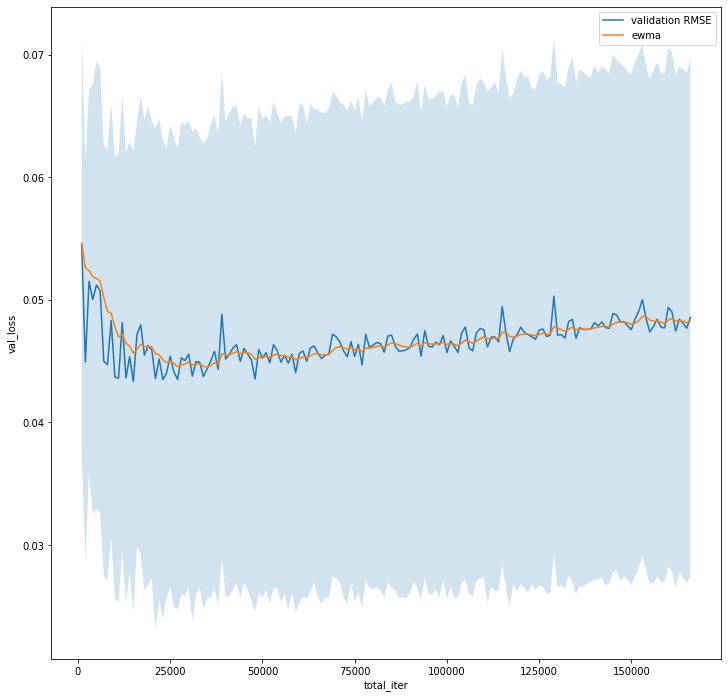

In [48]:
plt.figure(figsize=(12,12))
sns.lineplot(x='total_iter', y='val_loss', data=val_log, label='validation RMSE')
plt.fill_between(val_log.total_iter, val_log.val_loss - val_log.val_std, val_log.val_loss + val_log.val_std, alpha = .2)
halflife = 3
plt.plot(val_log.total_iter, ewma_halflife(val_log.val_loss, halflife), label = 'ewma')
plt.legend()